<a href="https://colab.research.google.com/github/nsharan2000/Project-AgroCaptain/blob/main/SegmentationofNIRImageandNDVIconversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this is the complete code of an image in NIR with JPG to an output ndvi scaled value
#code taken from: https://github.com/MuonRay/Image-VideoSegmentationinNIRforPlantDetection

#learn more about image formats: https://crops.extension.iastate.edu/cropnews/2016/05/choosing-right-imagery-best-management-practices-color-nir-and-ndvi-imagery

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

import matplotlib.pyplot as plt
from scipy import misc

import numpy as np
#For RGB and HSV Color Space Plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

from matplotlib.colors import hsv_to_rgb

#for ndvi colorbars

from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

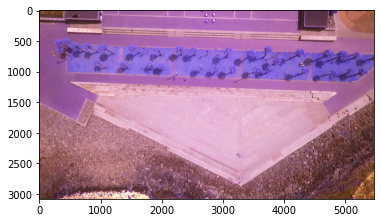

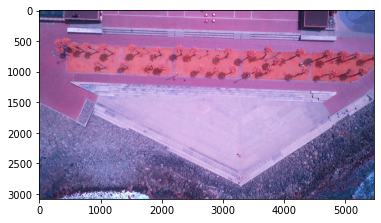

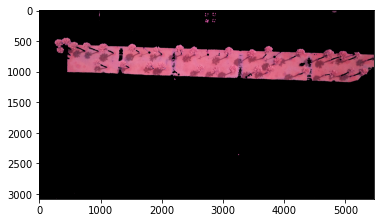

In [ ]:
#image = misc.imread('DJI_0860.JPG')

NIR = cv2.imread('/content/drive/MyDrive/archive/Image-VideoSegmentationinNIRforPlantDetection-master/testimages/DJI_0860.JPG')


plt.imshow(NIR)
plt.show()

#You’ll notice that it looks like the blue and red channels have been mixed up. 
#In fact, OpenCV by default reads images in BGR format. 
#You can use the cvtColor(image, flag) and the flag we looked at above to fix this:

NIR = cv2.cvtColor(NIR, cv2.COLOR_BGR2RGB)
plt.imshow(NIR)
plt.show()


#In HSV space, the red to orange color of plants in NIR are much more localized and visually separable. 
#The saturation and value of the oranges do vary, but they are mostly located 
#within a small range along the hue axis. 
#This is the key point that can be leveraged for segmentation.

#convert to HSV

hsv_NIR = cv2.cvtColor(NIR, cv2.COLOR_RGB2HSV)


#threshold vegetation using the red to orange colors of the vegetation in the NIR

# Red color
low_red = np.array([160, 105, 84])
high_red = np.array([179, 255, 255])


#create a binary mask and threshold the image using the selected colors

red_mask = cv2.inRange(hsv_NIR, low_red, high_red)

#keep every pixel the same as the original image

result = cv2.bitwise_and(NIR, NIR, mask=red_mask)

#show results

#plt.subplot(1, 2, 1)
#plt.imshow(red_mask, cmap="gray")
#plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
#NDVI Processing


ir = (result[:,:,0]).astype('float')


# Get one of the IR image bands (all bands should be same)
#blue = image[:, :, 2]

#r = np.asarray(blue, float)

r = (result[:,:,2]).astype('float')


ndvi = np.true_divide(np.subtract(ir, r), np.add(ir, r))



# Display the results
output_name = 'SegmentedInfraBlueNDVI.jpg'

#a nice selection of grayscale colour palettes
cols1 = ['blue', 'green', 'yellow', 'red']
cols2 =  ['gray', 'gray', 'red', 'yellow', 'green']
cols3 = ['gray', 'blue', 'green', 'yellow', 'red']

cols4 = ['black', 'gray', 'blue', 'green', 'yellow', 'red']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


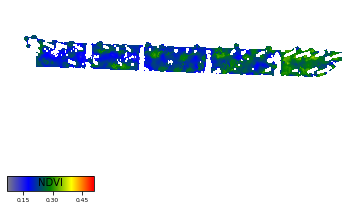

In [ ]:
def create_colormap(args):
    return LinearSegmentedColormap.from_list(name='custom1', colors=cols3)

#colour bar to match grayscale units
def create_colorbar(fig, image):
        position = fig.add_axes([0.125, 0.19, 0.2, 0.05])
        norm = colors.Normalize(vmin=-1., vmax=1.)
        cbar = plt.colorbar(image,
                            cax=position,
                            orientation='horizontal',
                            norm=norm)
        cbar.ax.tick_params(labelsize=6)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.set_label("NDVI", fontsize=10, x=0.5, y=0.5, labelpad=-25)

fig, ax = plt.subplots()
image = ax.imshow(ndvi, cmap=create_colormap(colors))
plt.axis('off')

create_colorbar(fig, image)

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(output_name, dpi=600, transparent=True, bbox_inches=extent, pad_inches=0)
        # plt.show()